In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/landmark-detection-data/role_challenge_dataset_ground_truth.csv
/kaggle/input/landmark-detection-data/images/245_HC.png
/kaggle/input/landmark-detection-data/images/442_HC.png
/kaggle/input/landmark-detection-data/images/073_HC.png
/kaggle/input/landmark-detection-data/images/364_2HC.png
/kaggle/input/landmark-detection-data/images/137_HC.png
/kaggle/input/landmark-detection-data/images/094_HC.png
/kaggle/input/landmark-detection-data/images/001_HC.png
/kaggle/input/landmark-detection-data/images/034_HC.png
/kaggle/input/landmark-detection-data/images/213_HC.png
/kaggle/input/landmark-detection-data/images/291_2HC.png
/kaggle/input/landmark-detection-data/images/491_HC.png
/kaggle/input/landmark-detection-data/images/253_HC.png
/kaggle/input/landmark-detection-data/images/221_HC.png
/kaggle/input/landmark-detection-data/images/119_HC.png
/kaggle/input/landmark-detection-data/images/157_HC.png
/kaggle/input/landmark-detection-data/images/066_2HC.png
/kaggle/input/landmark-

In [98]:
import numpy as np
import pandas as pd
import cv2
import os

In [99]:
df=pd.read_csv("/kaggle/input/landmark-detection-data/role_challenge_dataset_ground_truth.csv")

In [100]:
df.head()

,image_name,ofd_1_x,ofd_1_y,ofd_2_x,ofd_2_y,bpd_1_x,bpd_1_y,bpd_2_x,bpd_2_y
0,000_HC.png,361,12,339,530,481,16,664,318
1,001_HC.png,441,331,368,308,297,247,534,142
2,002_HC.png,318,374,154,406,481,158,558,215
3,003_HC.png,424,105,407,462,305,349,547,363
4,004_HC.png,300,277,611,534,53,452,494,308


In [101]:
base_dir="/kaggle/input/landmark-detection-data/images/"

In [102]:
img_list=os.listdir(base_dir)

In [103]:
img_list

['245_HC.png',
 '442_HC.png',
 '073_HC.png',
 '364_2HC.png',
 '137_HC.png',
 '094_HC.png',
 '001_HC.png',
 '034_HC.png',
 '213_HC.png',
 '291_2HC.png',
 '491_HC.png',
 '253_HC.png',
 '221_HC.png',
 '119_HC.png',
 '157_HC.png',
 '066_2HC.png',
 '492_HC.png',
 '495_HC.png',
 '408_HC.png',
 '120_HC.png',
 '123_HC.png',
 '372_HC.png',
 '397_HC.png',
 '014_HC.png',
 '359_2HC.png',
 '329_HC.png',
 '288_HC.png',
 '354_HC.png',
 '097_HC.png',
 '102_HC.png',
 '114_HC.png',
 '276_2HC.png',
 '086_HC.png',
 '436_HC.png',
 '170_HC.png',
 '227_HC.png',
 '417_HC.png',
 '118_HC.png',
 '229_HC.png',
 '183_HC.png',
 '449_HC.png',
 '108_2HC.png',
 '293_HC.png',
 '323_HC.png',
 '219_HC.png',
 '454_HC.png',
 '153_HC.png',
 '121_2HC.png',
 '391_HC.png',
 '026_HC.png',
 '328_HC.png',
 '285_HC.png',
 '112_HC.png',
 '375_HC.png',
 '263_HC.png',
 '458_HC.png',
 '050_2HC.png',
 '028_HC.png',
 '440_HC.png',
 '298_HC.png',
 '223_2HC.png',
 '400_HC.png',
 '220_HC.png',
 '163_HC.png',
 '276_HC.png',
 '106_HC.png',
 

In [104]:
img=cv2.imread(os.path.join(base_dir,img_list[0]))
img.shape

(540, 800, 3)

In [10]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [11]:
import tensorflow.keras
from tensorflow.keras.layers import Input,Conv2D,MaxPool2D,BatchNormalization,Flatten,Dense

In [12]:
model=tensorflow.keras.models.Sequential([
    Input(shape=(540,800,3)),
    Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"),
    MaxPool2D((2,2)),
    BatchNormalization(),
    Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"),
    MaxPool2D((2,2)),
    BatchNormalization(),
    Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"),
    MaxPool2D((2,2)),
    BatchNormalization(),
    Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu"),
    MaxPool2D((2,2)),
    BatchNormalization(),
    Flatten(),
    Dense(64,activation="relu"),
    Dense(8)
])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 540, 800, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 270, 400, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 270, 400, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 270, 400, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 135, 200, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 135, 200, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 135, 200, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 67, 100, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 67, 100, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 67, 100, 16)    │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 33, 50, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 33, 50, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 26400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,689,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,791,608 (6.83 MB)

 Trainable params: 1,791,128 (6.83 MB)

 Non-trainable params: 480 (1.88 KB)

In [14]:
x=cv2.imread(os.path.join(base_dir,"500_HC.png"))
x=cv2.resize(x,(800,540))
x.shape

(540, 800, 3)

In [15]:
x=cv2.imread(os.path.join(base_dir,img_list[0]))/255
x=cv2.resize(x,(800,540))
# x.shape
x.shape

(540, 800, 3)

In [16]:
mapping={}
listofimg=[]
for imagename in img_list:
    print(imagename,end="=")
    try:
        newimg=cv2.imread(os.path.join(base_dir,imagename))/255
        newimg=cv2.resize(newimg,(800,540))
        newimg=np.array(newimg,dtype="float16")
        newimg=np.round(newimg,decimals=2)
        listofimg.append(newimg)
        mapping[imagename]=newimg
        print("no error",newimg.shape)
    except:
        print("error-------------------------------",imagename)
        break

245_HC.png=no error (540, 800, 3)
442_HC.png=no error (540, 800, 3)
073_HC.png=no error (540, 800, 3)
364_2HC.png=no error (540, 800, 3)
137_HC.png=no error (540, 800, 3)
094_HC.png=no error (540, 800, 3)
001_HC.png=no error (540, 800, 3)
034_HC.png=no error (540, 800, 3)
213_HC.png=no error (540, 800, 3)
291_2HC.png=no error (540, 800, 3)
491_HC.png=no error (540, 800, 3)
253_HC.png=no error (540, 800, 3)
221_HC.png=no error (540, 800, 3)
119_HC.png=no error (540, 800, 3)
157_HC.png=no error (540, 800, 3)
066_2HC.png=no error (540, 800, 3)
492_HC.png=no error (540, 800, 3)
495_HC.png=no error (540, 800, 3)
408_HC.png=no error (540, 800, 3)
120_HC.png=no error (540, 800, 3)
123_HC.png=no error (540, 800, 3)
372_HC.png=no error (540, 800, 3)
397_HC.png=no error (540, 800, 3)
014_HC.png=no error (540, 800, 3)
359_2HC.png=no error (540, 800, 3)
329_HC.png=no error (540, 800, 3)
288_HC.png=no error (540, 800, 3)
354_HC.png=no error (540, 800, 3)
097_HC.png=no error (540, 800, 3)
102_HC.png

In [105]:
np.asarray(listofimg).shape

(622, 540, 800, 3)

In [55]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),loss="mae")

In [17]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.000001)

In [57]:
history=model.fit(np.asarray(listofimg),
          np.asarray(df[["ofd_1_x","ofd_1_y","ofd_2_x","ofd_2_y","bpd_1_x","bpd_1_y","bpd_2_x","bpd_2_y"]])
          ,epochs=30,batch_size=5,validation_split=0.3,callbacks=[reduce_lr])

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - loss: 203.8060 - val_loss: 198.6491 - learning_rate: 0.0010
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 80.4012 - val_loss: 259.7878 - learning_rate: 0.0010
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 71.5596 - val_loss: 232.7454 - learning_rate: 0.0010
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 67.2906 - val_loss: 223.7460 - learning_rate: 0.0010
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 66.6949 - val_loss: 214.4055 - learning_rate: 0.0010
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 65.1013 - val_loss: 94.8393 - learning_rate: 0.0010
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 64.8583 - val_loss: 126.5466 - learning_rate: 0.0010
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 63.0655 - val_loss: 85.1393 - learning_rate: 0.0010
Epoch 9/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 57.7652 - val_loss: 93.0354 - learning_rate:

The above model is overfitting and we can add dropouts,etc but better to work on below arch model. The above is just the baseline model so no need to spend more time on it.

In [58]:
from keras.models import load_model
model.save('..\\Model Weights\\my_model1.keras') #changed path so to make as per notebook location

In [24]:
# from keras.models import load_model
# model_loaded = load_model('..\\Model Weights\\my_model1.keras')

In [ ]:
#traing other model

In [133]:
model2_input=Input(shape=(540,800,3))
x=Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(model2_input)
x=BatchNormalization()(x)
y=MaxPool2D((2,2))(x)
x2=Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu")(y)
x2=BatchNormalization()(x2)
y2=MaxPool2D((2,2))(x2)
x3=Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu")(y2)
x3=BatchNormalization()(x3)
y3=MaxPool2D((2,2))(x3)
x4=Conv2D(filters=8,kernel_size=(3,3),padding="same",activation="relu")(y3)
x4=BatchNormalization()(x4)
y4=MaxPool2D((2,2))(x4)
# f1=Flatten()(x)
# f2=Flatten()(x2)
# f3=Flatten()(x3)
# f4=Flatten()(x4)
# x5=Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu")(x2)
# x5=BatchNormalization()(x5)
# y5=MaxPool2D((2,2))(x5)
# x6=Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu")(y5)
# x6=BatchNormalization()(x6)
# y6=MaxPool2D((2,2))(x6)
# x7=Conv2D(filters=8,kernel_size=(3,3),padding="same",activation="relu")(y5)
# x7=BatchNormalization()(x7)
# y7=MaxPool2D((2,2))(x7)
f5=Flatten()(y4)
x_1=Conv2D(filters=3,kernel_size=(3,3),padding="same",activation="relu")(model2_input)
x_1=BatchNormalization()(x_1)
y_1=MaxPool2D((2,2))(x_1)
y_1=Conv2D(filters=2,kernel_size=(3,3),padding="same",activation="relu")(y_1)
y_1=BatchNormalization()(y_1)
y_1=MaxPool2D((2,2))(y_1)
y_1=Conv2D(filters=1,kernel_size=(3,3),padding="same",activation="relu")(y_1)
y_1=BatchNormalization()(y_1)
y_1=MaxPool2D((2,2))(y_1)
f6=Flatten()(y_1)
# f7=Flatten()(y_2)
merged = tensorflow.keras.layers.concatenate([f5,f6])
# merged=BatchNormalization()(merged)
x5=Dense(128,activation="relu")(merged)
x5=BatchNormalization()(x5)
model2_output=Dense(8)(x5)

In [134]:
model2=tensorflow.keras.models.Model(inputs=model2_input, outputs=model2_output)

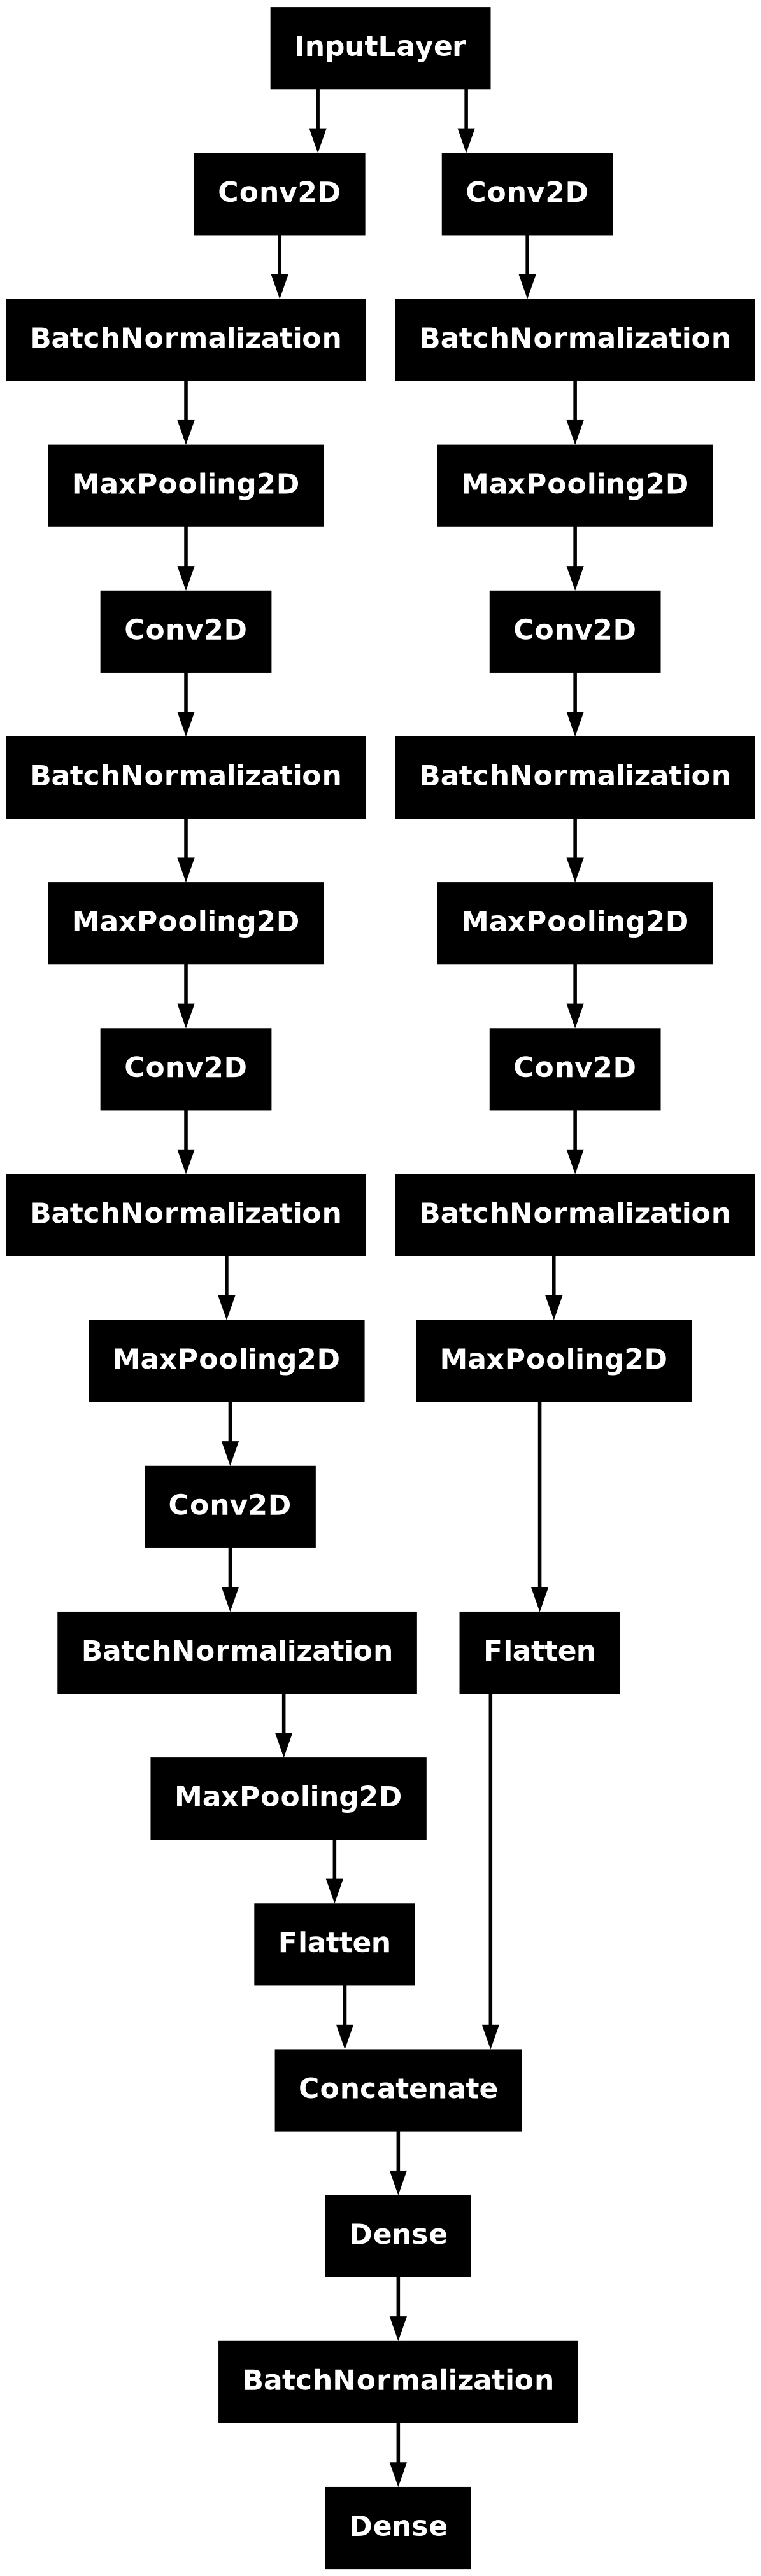

In [135]:
tensorflow.keras.utils.plot_model(model2, to_file='Assets\\model_plot(1).png')

In [136]:
model2.summary()

Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22      │ (None, 540, 800,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_118 (Conv2D) │ (None, 540, 800,  │      1,792 │ input_layer_22[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 540, 800,  │        256 │ conv2d_118[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_115   │ (None, 270, 400,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_119 (Conv2D) │ (None, 270, 400,  │     18,464 │ max_pooling2d_11… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_122 (Conv2D) │ (None, 540, 800,  │         84 │ input_layer_22[0… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 270, 400,  │        128 │ conv2d_119[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 540, 800,  │         12 │ conv2d_122[0][0]  │
│ (BatchNormalizatio… │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_116   │ (None, 135, 200,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_119   │ (None, 270, 400,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_120 (Conv2D) │ (None, 135, 200,  │      4,624 │ max_pooling2d_11… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_123 (Conv2D) │ (None, 270, 400,  │         56 │ max_pooling2d_11… │
│                     │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 135, 200,  │         64 │ conv2d_120[0][0]  │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 270, 400,  │          8 │ conv2d_123[0][0]  │
│ (BatchNormalizatio… │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_117   │ (None, 67, 100,   │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_120   │ (None, 135, 200,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_121 (Conv2D) │ (None, 67, 100,   │      1,160 │ max_pooling2d_11

 Total params: 2,575,575 (9.83 MB)

 Trainable params: 2,575,067 (9.82 MB)

 Non-trainable params: 508 (1.98 KB)

In [137]:
model2.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),loss="mae")

In [138]:
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=3, min_lr=0.00001)
checkpoint_path = "..\\Model Weights\\best_model.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history2=model2.fit(np.asarray(listofimg),
          np.asarray(df[["ofd_1_x","ofd_1_y","ofd_2_x","ofd_2_y","bpd_1_x","bpd_1_y","bpd_2_x","bpd_2_y"]])
          ,epochs=30,batch_size=4,validation_split=0.3,callbacks=[reduce_lr,checkpoint])

Epoch 1/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 341.2454
Epoch 1: val_loss improved from inf to 327.27063, saving model to best_model.keras
109/109 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - loss: 341.1987 - val_loss: 327.2706 - learning_rate: 0.0010
Epoch 2/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 330.6096
Epoch 2: val_loss improved from 327.27063 to 319.00626, saving model to best_model.keras
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 330.5951 - val_loss: 319.0063 - learning_rate: 0.0010
Epoch 3/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 316.0014
Epoch 3: val_loss improved from 319.00626 to 301.13461, saving model to best_model.keras
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 315.9836 - val_loss: 301.1346 - learning_rate: 0.0010
Epoch 4/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 295.2184
Epoch 4: val_loss improved from 301.13461 to 272.47189, saving model to best_model.keras
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 295.18

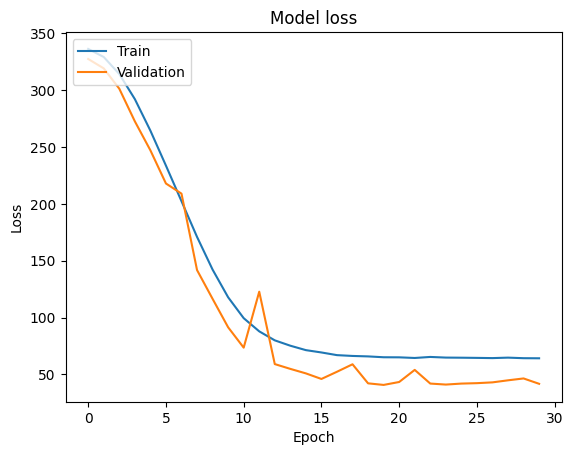

In [139]:
    import matplotlib.pyplot as plt
    plt.plot(history2.history['loss'])
    plt.plot(history2.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [140]:
#no need best model already saved
# from tensorflow.keras.models import load_model
# model2.save('my_model2.keras')